In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from collections import Counter

# 1.读取数据

In [3]:
df=pd.read_table(r"C:\Users\CDA\Desktop\customer\userlostprob.txt")

# 2.数据查看

In [4]:
df.describe()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,385450.000000,82915.000000,386525.000000,689148.000000,447831.000000,661312.000000,447831.000000,...,660664.000000,447831.000000,602960.000000,682274.000000,651263.000000,592818.000000,457896.000000,689945.000000,5.929100e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,5.317048,1.856094,11.710487,1.060996,0.342119,6.086366,154.179369,...,318.541812,101830.919400,0.368237,10.648278,2.253250,12049.409382,1.137476,153.702414,1.855185e+04,14.462315
std,0.446238,4.146815e+05,0.395226,38.524483,2.103862,17.251429,0.045264,0.354210,12.413225,398.456986,...,351.913035,122784.313864,0.219945,15.696682,3.538453,25601.374138,0.204789,277.807697,2.288603e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.007000,0.007000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,2.000000,1.000000,2.000000,1.030000,0.000000,0.000000,0.000000,...,145.000000,14999.000000,0.170000,0.827000,0.127000,551.000000,1.000000,17.000000,4.710000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,3.000000,1.000000,6.000000,1.050000,0.250000,0.000000,2.000000,...,233.000000,46890.000000,0.400000,3.527000,0.627000,2848.000000,1.050000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,5.000000,2.000000,14.000000,1.090000,0.570000,4.000000,153.000000,...,388.000000,138953.000000,0.550000,13.327000,2.747000,10726.000000,1.210000,180.000000,3.141000e+03,20.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,43700.000000,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000


In [5]:
df.shape

(689945, 51)

# 3.数据清洗

## 3.1 缺失值可视化展示

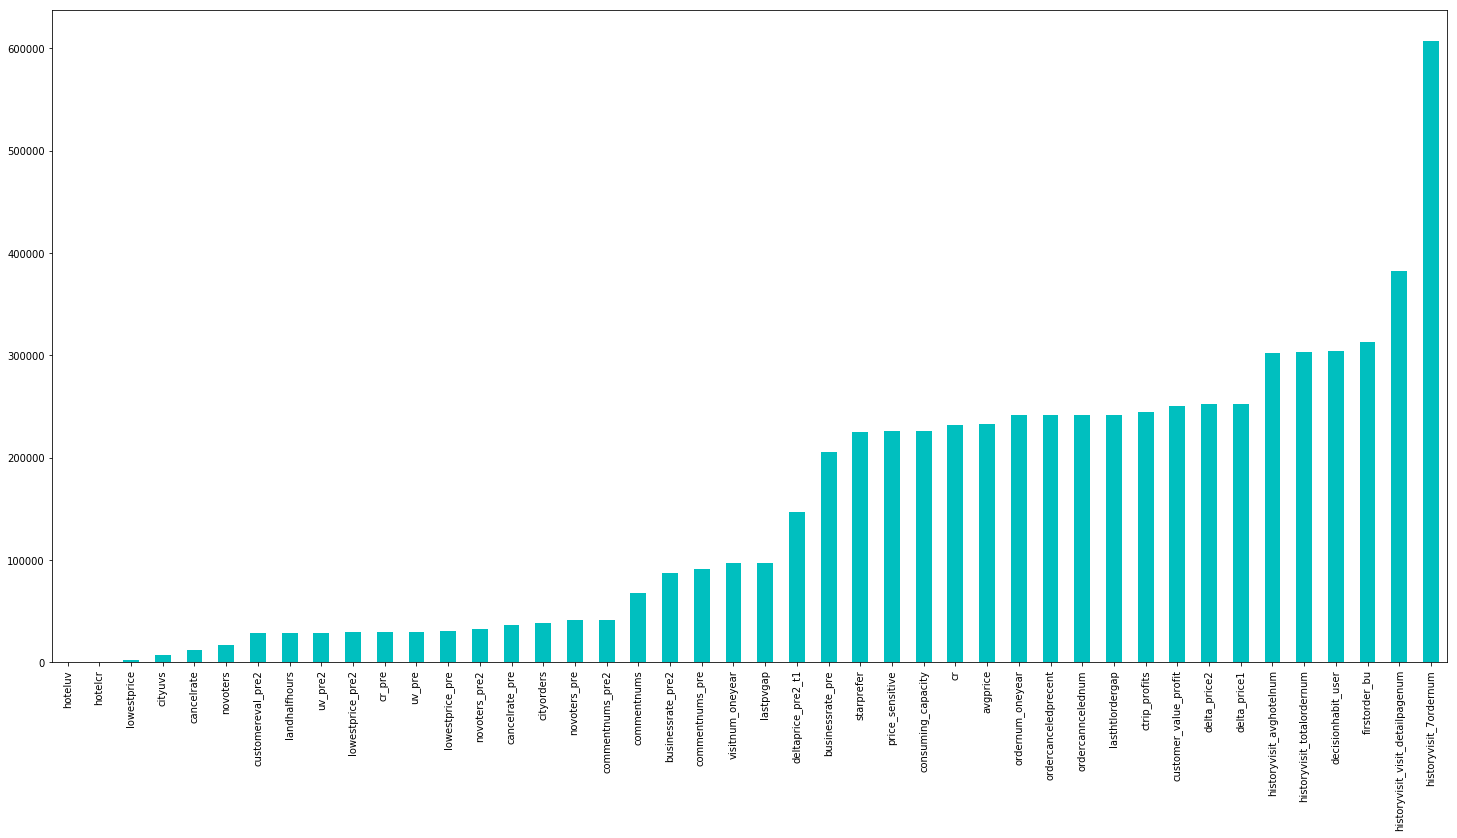

In [6]:
missingTotal = df.isnull().sum()
missingExist = missingTotal[missingTotal > 0]
missingExist.sort_values(inplace=True)
f, ax = plt.subplots(figsize = (25,12))
missingExist.plot.bar(color = "c")

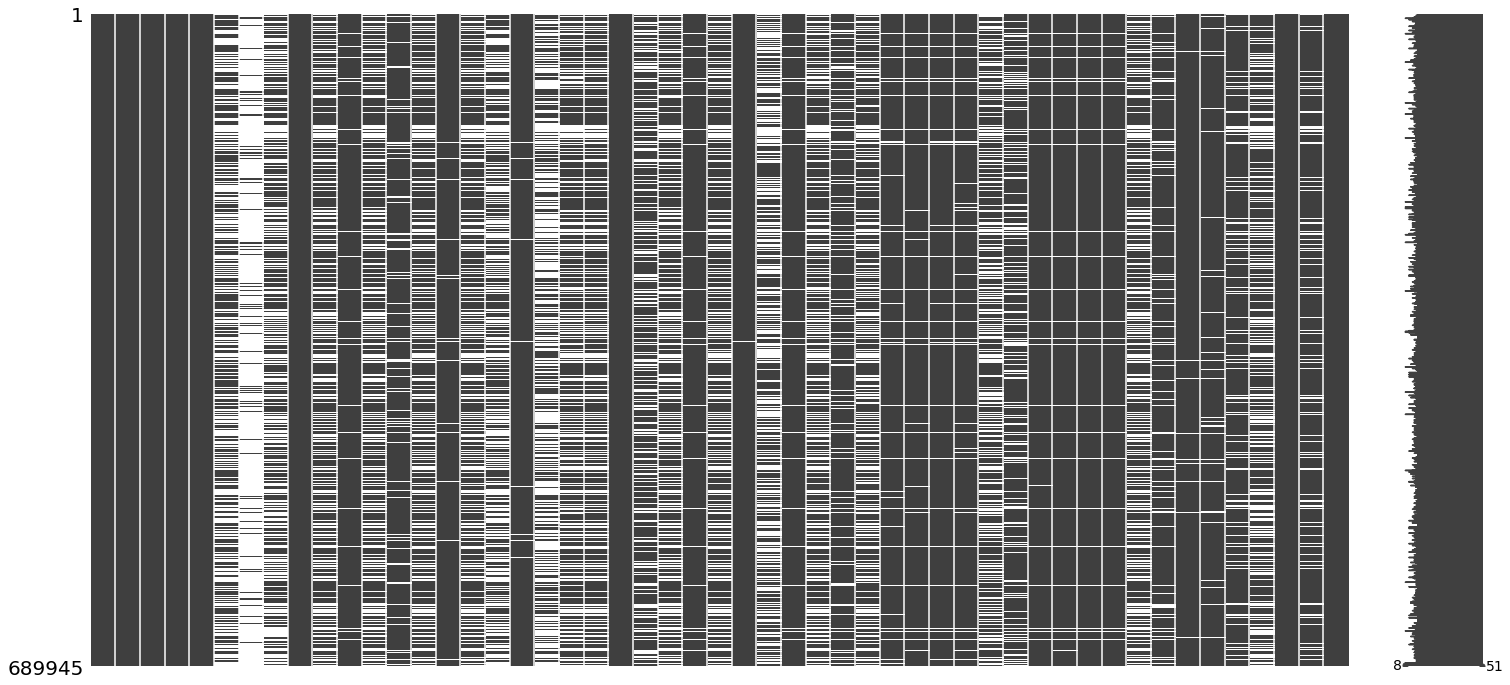

In [9]:
#另一种可视化绘图方法
#import missingno as msno
#msno.matrix(df,figsize=(25,12))

## 3.2缺失值填充

### 3.2.1以下变量缺失值用0填充

In [7]:
df.fillna({"historyvisit_totalordernum":0,"ordercanceledprecent":0,\
           "landhalfhours":0,"ordercanncelednum":0,"commentnums":0,"novoters":0,"historyvisit_avghotelnum":0,\
          "cancelrate":0,"historyvisit_visit_detailpagenum":0,"ordernum_oneyear":0,"customer_value_profit":0,\
          "ctrip_profits":0,"cityuvs":0,"cityorders":0},inplace=True)

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.04,0.00,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.06,0.00,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,0.0,1.05,0.00,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.01,0.00,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,0.0,1.00,0.00,...,84.0,NaN,NaN,0.013,0.000,NaN,NaN,1,NaN,21
5,1,24645,2016-05-18,2016-05-20,0,NaN,NaN,0.0,1.02,0.00,...,408.0,NaN,NaN,2.880,0.427,NaN,NaN,1,NaN,21
6,0,24647,2016-05-18,2016-05-25,0,NaN,NaN,0.0,1.12,0.00,...,145.0,NaN,NaN,4.427,0.493,NaN,NaN,1,NaN,22
7,0,24650,2016-05-18,2016-05-20,0,3.0,NaN,21.0,1.11,0.79,...,204.0,10475.0,0.53,12.713,1.987,7566.0,1.50,23,1265.0,17
8,0,24652,2016-05-18,2016-05-19,0,13.0,NaN,0.0,1.08,0.00,...,99.0,NaN,0.41,5.393,0.860,15.0,1.00,20,596.0,20
9,0,24653,2016-05-18,2016-06-08,1,2.0,NaN,7.0,1.07,0.86,...,191.0,18873.0,0.52,3.093,0.287,288.0,1.00,31,21926.0,7


### 3.2.2以下变量缺失值用均值填充

In [8]:
df.fillna({"customereval_pre2":df["customereval_pre2"].mean(),\
          "delta_price2":df[ "delta_price2"].mean(),\
          "commentnums_pre":df["commentnums_pre"].mean(),\
          "commentnums_pre2":df["commentnums_pre2"].mean(),\
          "cancelrate_pre":df["cancelrate_pre"].mean(),\
          "novoters_pre2":df["novoters_pre2"].mean(),\
          "lasthtlordergap":df["lasthtlordergap"].mean(),\
          "lastpvgap":df[ "lastpvgap"].mean()},inplace=True)

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.04,0.00,...,615.0,101830.9194,0.29,12.880,3.147,12049.409382,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.06,0.00,...,513.0,101830.9194,0.53,17.933,4.913,12049.409382,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,0.0,1.05,0.00,...,382.0,101830.9194,0.60,3.993,0.760,12049.409382,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.01,0.00,...,203.0,101830.9194,0.18,3.220,0.660,12049.409382,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,0.0,1.00,0.00,...,84.0,101830.9194,NaN,0.013,0.000,12049.409382,NaN,1,NaN,21
5,1,24645,2016-05-18,2016-05-20,0,NaN,NaN,0.0,1.02,0.00,...,408.0,101830.9194,NaN,2.880,0.427,12049.409382,NaN,1,NaN,21
6,0,24647,2016-05-18,2016-05-25,0,NaN,NaN,0.0,1.12,0.00,...,145.0,101830.9194,NaN,4.427,0.493,12049.409382,NaN,1,NaN,22
7,0,24650,2016-05-18,2016-05-20,0,3.0,NaN,21.0,1.11,0.79,...,204.0,10475.0000,0.53,12.713,1.987,7566.000000,1.50,23,1265.0,17
8,0,24652,2016-05-18,2016-05-19,0,13.0,NaN,0.0,1.08,0.00,...,99.0,101830.9194,0.41,5.393,0.860,15.000000,1.00,20,596.0,20
9,0,24653,2016-05-18,2016-06-08,1,2.0,NaN,7.0,1.07,0.86,...,191.0,18873.0000,0.52,3.093,0.287,288.000000,1.00,31,21926.0,7


### 3.2.3以下变量缺失值用中位数填充

In [9]:
df.fillna({"delta_price1":df["delta_price1"].median(),\
           "hoteluv":df["hoteluv"].median(),\
           "avgprice":df["avgprice"].median(),\
           "lowestprice":df["lowestprice"].median(),\
           "firstorder_bu":df["firstorder_bu"].median(),\
           "novoters_pre":df["novoters_pre"].median(),\
           "deltaprice_pre2_t1":df["deltaprice_pre2_t1"].median(),\
           "lowestprice_pre":df["lowestprice_pre"].median(),\
           "uv_pre":df["uv_pre"].median(),\
           "uv_pre2":df["uv_pre2"].median(),\
           "lowestprice_pre2":df["lowestprice_pre2"].median(),\
           "visitnum_oneyear":df["visitnum_oneyear"].median()},inplace=True)

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.04,0.00,...,615.0,101830.9194,0.29,12.880,3.147,12049.409382,NaN,7,1315.0,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.06,0.00,...,513.0,101830.9194,0.53,17.933,4.913,12049.409382,NaN,33,1315.0,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,0.0,1.05,0.00,...,382.0,101830.9194,0.60,3.993,0.760,12049.409382,NaN,10,1315.0,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,0.0,1.01,0.00,...,203.0,101830.9194,0.18,3.220,0.660,12049.409382,NaN,8,1315.0,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,0.0,1.00,0.00,...,84.0,101830.9194,NaN,0.013,0.000,12049.409382,NaN,1,1315.0,21
5,1,24645,2016-05-18,2016-05-20,0,NaN,NaN,0.0,1.02,0.00,...,408.0,101830.9194,NaN,2.880,0.427,12049.409382,NaN,1,1315.0,21
6,0,24647,2016-05-18,2016-05-25,0,NaN,NaN,0.0,1.12,0.00,...,145.0,101830.9194,NaN,4.427,0.493,12049.409382,NaN,1,1315.0,22
7,0,24650,2016-05-18,2016-05-20,0,3.0,NaN,21.0,1.11,0.79,...,204.0,10475.0000,0.53,12.713,1.987,7566.000000,1.50,23,1265.0,17
8,0,24652,2016-05-18,2016-05-19,0,13.0,NaN,0.0,1.08,0.00,...,99.0,101830.9194,0.41,5.393,0.860,15.000000,1.00,20,596.0,20
9,0,24653,2016-05-18,2016-06-08,1,2.0,NaN,7.0,1.07,0.86,...,191.0,18873.0000,0.52,3.093,0.287,288.000000,1.00,31,21926.0,7


### 3.2.4以下变量查看分布后再决定填充方式

In [12]:
# df["historyvisit_7ordernum"]
#     "decisionhabit_user":df["decisionhabit_user"].median(),\
#            "hotelcr":df["hotelcr"].median(),\
#            "starprefer":df["starprefer"].median(),\
#            "consuming_capacity":df["consuming_capacity"].median(),\
#            "price_sensitive":df["price_sensitive"].median(),\
#            "businessrate_pre":df["businessrate_pre"].median(),\
#            "cr_pre":df["cr_pre"].median(),\
#            "businessrate_pre2":df["businessrate_pre2"].median(),\
#            "cr":df["cr"].median()

### historyvisit_7ordernum

Counter({1.0: 47836, 2.0: 18829, 3.0: 8216, 4.0: 3797, 5.0: 1990, 6.0: 848, 7.0: 683, 8.0: 279, 9.0: 162, 10.0: 88, 11.0: 65, 12.0: 48, 16.0: 26, 106.0: 18, 13.0: 15, 14.0: 6, 15.0: 3, 22.0: 2, 40.0: 2, 92.0: 1, 24.0: 1})
[(1.0, 47836)]
1.856093589820901
1.0


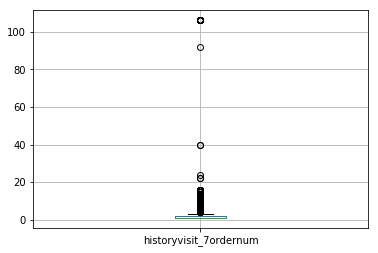

In [10]:
df.boxplot("historyvisit_7ordernum")

#去除空值
notnull=df[pd.notnull(df["historyvisit_7ordernum"])]  
a=notnull["historyvisit_7ordernum"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["historyvisit_7ordernum"].mean())
print(df["historyvisit_7ordernum"].median())

In [11]:
df["historyvisit_7ordernum"] = df["historyvisit_7ordernum"].fillna(df["historyvisit_7ordernum"].median())

### starprefer

Counter({40.0: 52688, 80.0: 42115, 60.0: 41805, 100.0: 22617, 70.0: 12477, 50.0: 10899, 90.0: 8059, 66.700000000000003: 7108, 73.299999999999997: 6853, 53.299999999999997: 6129, 86.700000000000003: 5559, 46.700000000000003: 4902, 75.0: 4195, 93.299999999999997: 3851, 65.0: 3817, 55.0: 3560, 85.0: 3298, 0.0: 3259, 45.0: 2731, 68.0: 2695, 84.0: 2687, 64.0: 2610, 76.0: 2606, 72.0: 2541, 56.0: 2294, 48.0: 2187, 95.0: 2140, 76.700000000000003: 2103, 52.0: 2069, 88.0: 2052, 83.299999999999997: 1816, 63.299999999999997: 1795, 92.0: 1683, 82.900000000000006: 1622, 77.099999999999994: 1603, 65.700000000000003: 1533, 74.299999999999997: 1474, 71.400000000000006: 1437, 56.700000000000003: 1434, 62.899999999999999: 1413, 85.700000000000003: 1380, 20.0: 1377, 77.5: 1354, 96.0: 1332, 44.0: 1331, 43.299999999999997: 1241, 82.5: 1203, 68.599999999999994: 1185, 54.299999999999997: 1158, 84.400000000000006: 1145, 88.599999999999994: 1141, 51.399999999999999: 1099, 75.599999999999994: 1096, 62.5: 1061, 5

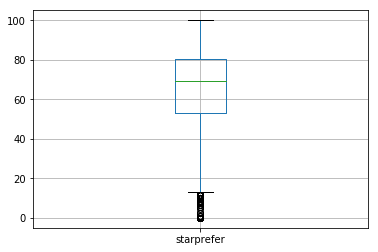

In [12]:
df.boxplot("starprefer")

#去除空值
notnull=df[pd.notnull(df["starprefer"])]  
a=notnull["starprefer"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["starprefer"].mean())
print(df["starprefer"].median())

In [13]:
df["starprefer"] = df["starprefer"].fillna(40)

### consuming_capacity

Counter({100.0: 18985, 19.0: 10594, 29.0: 10589, 25.0: 10441, 23.0: 10342, 22.0: 10276, 28.0: 10261, 26.0: 10235, 18.0: 10156, 27.0: 9964, 16.0: 9964, 24.0: 9745, 21.0: 9625, 33.0: 9618, 20.0: 9521, 31.0: 9486, 17.0: 9475, 30.0: 9277, 32.0: 9268, 15.0: 9188, 36.0: 8862, 34.0: 8490, 35.0: 8380, 13.0: 8330, 38.0: 8034, 14.0: 8029, 39.0: 8012, 37.0: 7917, 12.0: 7286, 40.0: 7043, 42.0: 6652, 41.0: 6604, 44.0: 6409, 43.0: 6234, 11.0: 6027, 45.0: 5946, 46.0: 5769, 47.0: 5661, 49.0: 5322, 48.0: 5219, 50.0: 4757, 10.0: 4589, 51.0: 4420, 52.0: 4222, 53.0: 4221, 54.0: 4065, 55.0: 3820, 9.0: 3768, 59.0: 3657, 58.0: 3601, 56.0: 3492, 57.0: 3356, 60.0: 3036, 62.0: 2845, 61.0: 2820, 63.0: 2693, 65.0: 2636, 68.0: 2584, 64.0: 2526, 67.0: 2520, 66.0: 2400, 70.0: 2314, 8.0: 2207, 69.0: 2199, 71.0: 1963, 73.0: 1907, 78.0: 1680, 74.0: 1603, 72.0: 1601, 1.0: 1582, 76.0: 1527, 77.0: 1501, 75.0: 1470, 79.0: 1433, 83.0: 1360, 80.0: 1339, 88.0: 1263, 84.0: 1234, 82.0: 1128, 81.0: 1107, 7.0: 1083, 86.0: 1050, 8

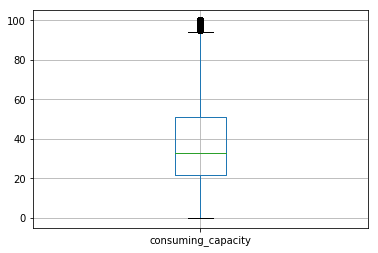

In [14]:
df.boxplot("consuming_capacity")

#去除空值
notnull=df[pd.notnull(df["consuming_capacity"])]  
a=notnull["consuming_capacity"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["consuming_capacity"].mean())
print(df["consuming_capacity"].median())

In [15]:
df["consuming_capacity"] = df["consuming_capacity"].fillna(df["consuming_capacity"].median())

### price_sensitive

Counter({0.0: 67453, 100.0: 23644, 11.0: 11347, 9.0: 11324, 6.0: 11216, 10.0: 11122, 7.0: 11122, 8.0: 11093, 14.0: 10920, 5.0: 10893, 12.0: 10882, 13.0: 10810, 1.0: 10081, 16.0: 10066, 15.0: 10010, 4.0: 9969, 17.0: 9500, 3.0: 9330, 18.0: 9250, 2.0: 9180, 19.0: 8873, 20.0: 7993, 21.0: 7687, 22.0: 7301, 23.0: 7278, 24.0: 6832, 25.0: 6558, 26.0: 6345, 27.0: 5578, 28.0: 5381, 29.0: 5300, 30.0: 4912, 32.0: 4537, 31.0: 4356, 33.0: 4049, 36.0: 3734, 34.0: 3732, 35.0: 3726, 38.0: 3349, 37.0: 3292, 39.0: 3074, 40.0: 3040, 46.0: 2813, 41.0: 2792, 42.0: 2720, 43.0: 2678, 45.0: 2511, 44.0: 2313, 47.0: 2134, 49.0: 2122, 48.0: 2111, 51.0: 2039, 52.0: 1883, 50.0: 1870, 55.0: 1660, 54.0: 1578, 56.0: 1571, 53.0: 1530, 58.0: 1466, 57.0: 1418, 63.0: 1407, 59.0: 1351, 60.0: 1343, 61.0: 1278, 65.0: 1172, 62.0: 1118, 70.0: 1118, 66.0: 1073, 64.0: 1030, 67.0: 998, 69.0: 958, 68.0: 951, 71.0: 920, 72.0: 814, 73.0: 814, 80.0: 761, 76.0: 760, 74.0: 721, 75.0: 719, 79.0: 670, 84.0: 627, 77.0: 624, 83.0: 623, 81.

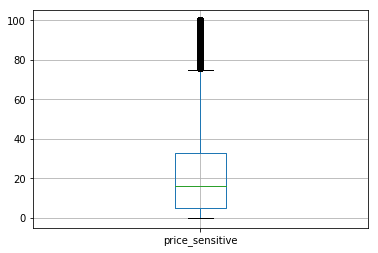

In [16]:
df.boxplot("price_sensitive")

#去除空值
notnull=df[pd.notnull(df["price_sensitive"])]  
a=notnull["price_sensitive"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["price_sensitive"].mean())
print(df["price_sensitive"].median())

In [17]:
df["price_sensitive"] = df["price_sensitive"].fillna(0)

### businessrate_pre

Counter({0.02: 14033, 0.040000000000000001: 12223, 0.029999999999999999: 11606, 0.01: 11487, 0.050000000000000003: 9691, 0.059999999999999998: 9193, 0.070000000000000007: 7915, 0.55000000000000004: 7783, 0.51000000000000001: 7779, 0.46999999999999997: 7764, 0.47999999999999998: 7605, 0.57999999999999996: 7570, 0.64000000000000001: 7554, 0.53000000000000003: 7465, 0.080000000000000002: 7434, 0.46000000000000002: 7308, 0.56000000000000005: 7304, 0.48999999999999999: 7211, 0.56999999999999995: 7167, 0.37: 7144, 0.58999999999999997: 7133, 0.54000000000000004: 7039, 0.52000000000000002: 6956, 0.5: 6932, 0.41999999999999998: 6918, 0.65000000000000002: 6841, 0.60999999999999999: 6787, 0.59999999999999998: 6725, 0.13: 6679, 0.63: 6657, 0.39000000000000001: 6503, 0.44: 6462, 0.42999999999999999: 6400, 0.45000000000000001: 6390, 0.28999999999999998: 6339, 0.40999999999999998: 6287, 0.62: 6284, 0.29999999999999999: 6117, 0.68000000000000005: 5996, 0.089999999999999997: 5915, 0.38: 5720, 0.25: 562

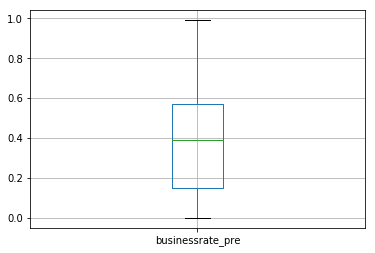

In [18]:
df.boxplot("businessrate_pre")

#去除空值
notnull=df[pd.notnull(df["businessrate_pre"])]  
a=notnull["businessrate_pre"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["businessrate_pre"].mean())
print(df["businessrate_pre"].median())

In [19]:
df["businessrate_pre"] = df["businessrate_pre"].fillna(df["businessrate_pre"].median())

### cr_pre

Counter({1.03: 68216, 1.04: 65553, 1.02: 65381, 1.05: 59806, 1.0600000000000001: 58023, 1.0700000000000001: 52249, 1.01: 48249, 1.0800000000000001: 45624, 1.0900000000000001: 37939, 1.1000000000000001: 32353, 1.1100000000000001: 25016, 1.0: 21865, 1.1200000000000001: 20582, 1.1299999999999999: 15655, 1.1399999999999999: 11676, 1.1499999999999999: 9045, 1.1599999999999999: 6545, 1.1699999999999999: 4366, 1.1799999999999999: 3689, 1.1899999999999999: 2391, 1.2: 1635, 1.21: 1181, 1.22: 924, 1.23: 645, 1.24: 450, 1.26: 295, 1.25: 254, 1.28: 195, 1.27: 156, 1.29: 106, 1.3799999999999999: 68, 1.3: 58, 1.52: 41, 1.3400000000000001: 41, 1.3100000000000001: 39, 1.4099999999999999: 33, 1.6899999999999999: 33, 1.3200000000000001: 28, 1.3300000000000001: 27, 1.45: 16, 1.4399999999999999: 12, 1.4299999999999999: 12, 1.3600000000000001: 11, 1.6000000000000001: 10, 1.3999999999999999: 8, 1.5: 7, 1.3899999999999999: 7, 1.9099999999999999: 4, 1.79: 4, 1.47: 4, 2.9500000000000002: 3, 1.3500000000000001:

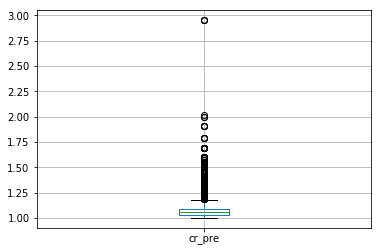

In [20]:
df.boxplot("cr_pre")

#去除空值
notnull=df[pd.notnull(df["cr_pre"])]  
a=notnull["cr_pre"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["cr_pre"].mean())
print(df["cr_pre"].median())

In [21]:
df["cr_pre"] = df["cr_pre"].fillna(df["cr_pre"].median())

### businessrate_pre2

Counter({0.029999999999999999: 16672, 0.02: 16080, 0.040000000000000001: 15630, 0.050000000000000003: 13303, 0.059999999999999998: 12538, 0.070000000000000007: 10899, 0.53000000000000003: 10835, 0.51000000000000001: 10667, 0.56000000000000005: 10396, 0.46999999999999997: 10374, 0.55000000000000004: 10319, 0.5: 10165, 0.52000000000000002: 10142, 0.45000000000000001: 10136, 0.46000000000000002: 10106, 0.48999999999999999: 10073, 0.54000000000000004: 10068, 0.57999999999999996: 10011, 0.56999999999999995: 10006, 0.58999999999999997: 9943, 0.47999999999999998: 9916, 0.44: 9824, 0.41999999999999998: 9688, 0.42999999999999999: 9495, 0.59999999999999998: 9375, 0.60999999999999999: 9048, 0.40999999999999998: 9018, 0.080000000000000002: 8800, 0.39000000000000001: 8743, 0.62: 8518, 0.63: 8343, 0.40000000000000002: 8230, 0.37: 8160, 0.01: 8159, 0.38: 8092, 0.64000000000000001: 7580, 0.35999999999999999: 7419, 0.65000000000000002: 7419, 0.34999999999999998: 7416, 0.34000000000000002: 7256, 0.08999

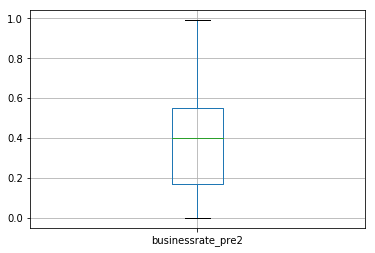

In [22]:
df.boxplot("businessrate_pre2")

#去除空值
notnull=df[pd.notnull(df["businessrate_pre2"])]  
a=notnull["businessrate_pre2"]
print(Counter(a))  #分别计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

print(df["businessrate_pre2"].mean())
print(df["businessrate_pre2"].median())

In [23]:
df["businessrate_pre2"] = df["businessrate_pre2"].fillna(df["businessrate_pre2"].median())

### cr

Counter({1.0: 214775, 1.3300000000000001: 15339, 1.25: 14438, 1.5: 13226, 1.1699999999999999: 12711, 1.2: 12557, 1.1299999999999999: 11059, 1.1399999999999999: 10872, 1.1100000000000001: 9351, 1.0800000000000001: 8644, 1.0700000000000001: 7353, 1.1000000000000001: 7042, 2.0: 6686, 1.0600000000000001: 6639, 1.0900000000000001: 6405, 1.29: 6159, 1.05: 5599, 1.1799999999999999: 5019, 1.3999999999999999: 4866, 1.22: 4766, 1.1499999999999999: 4651, 1.04: 4564, 1.27: 3678, 1.03: 3598, 1.21: 3247, 1.1899999999999999: 3072, 1.1200000000000001: 2991, 1.3799999999999999: 2862, 1.23: 2816, 1.3: 2601, 1.3100000000000001: 2560, 1.6699999999999999: 2425, 1.24: 2336, 1.3600000000000001: 2294, 1.4299999999999999: 2186, 1.1599999999999999: 2041, 1.4399999999999999: 1612, 1.26: 1603, 1.02: 1544, 1.3899999999999999: 1469, 1.3200000000000001: 1413, 1.28: 1375, 1.46: 1353, 1.4199999999999999: 1315, 1.3500000000000001: 1286, 1.6000000000000001: 1232, 1.5700000000000001: 904, 1.4099999999999999: 837, 1.47: 8

1.05

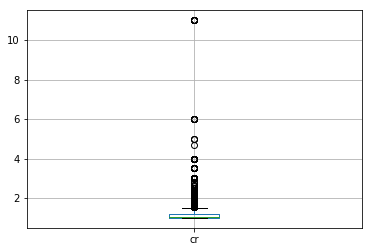

In [24]:
#df["cr"].value_counts().sort_index()

df.boxplot("cr")

#去除空值
notnull=df[pd.notnull(df["cr"])]  
a=notnull["cr"]
print(Counter(a))  #分组计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

df["cr"].mean()

df["cr"].median()

In [25]:
df["cr"] = df["cr"].fillna(1)

#### decisionhabit_user

Counter({1.0: 85039, 2.0: 81397, 3.0: 57239, 4.0: 40170, 5.0: 27632, 6.0: 20543, 7.0: 15142, 8.0: 11014, 9.0: 8247, 10.0: 6644, 11.0: 5413, 12.0: 4386, 13.0: 3175, 14.0: 2746, 15.0: 2048, 16.0: 1864, 17.0: 1516, 19.0: 1226, 18.0: 1134, 20.0: 947, 21.0: 836, 22.0: 680, 25.0: 668, 24.0: 618, 27.0: 579, 23.0: 572, 26.0: 410, 28.0: 381, 31.0: 323, 30.0: 277, 29.0: 274, 35.0: 155, 32.0: 150, 34.0: 138, 42.0: 125, 33.0: 124, 38.0: 122, 40.0: 111, 39.0: 79, 0.0: 72, 44.0: 70, 49.0: 66, 36.0: 64, 41.0: 64, 51.0: 60, 48.0: 58, 43.0: 57, 37.0: 51, 47.0: 51, 50.0: 46, 45.0: 42, 59.0: 38, 87.0: 29, 61.0: 26, 71.0: 26, 100.0: 26, 82.0: 25, 64.0: 22, 66.0: 22, 62.0: 21, 89.0: 20, 53.0: 19, 77.0: 19, 63.0: 17, 56.0: 17, 55.0: 17, 2148.0: 17, 78.0: 16, 95.0: 14, 872.0: 13, 1815.0: 12, 2123.0: 11, 1848.0: 10, 46.0: 10, 1598.0: 10, 2102.0: 9, 57.0: 9, 2029.0: 8, 154.0: 8, 73.0: 8, 1742.0: 7, 2158.0: 7, 1703.0: 6, 108.0: 6, 800.0: 6, 937.0: 6, 1993.0: 6, 1096.0: 5, 2154.0: 4, 2253.0: 4, 74.0: 4, 54.0: 4,

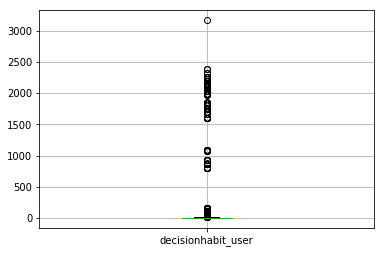

In [26]:
df.boxplot("decisionhabit_user")

#去除空值
notnull=df[pd.notnull(df["decisionhabit_user"])]  
a=notnull["decisionhabit_user"]

print(Counter(a))  #分类计数

print (Counter(a).most_common(1)) #查看出现最多次数的数据

#分箱
c=pd.Series(a)  
s=pd.cut(c,[0,2,22,3167])

print (Counter(s))  #查看分箱结果

In [27]:
df["decisionhabit_user"]=df["decisionhabit_user"].fillna(1) # 采用最多的决策习惯进行填充

In [17]:
#df["decisionhabit_user"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: decisionhabit_user, dtype: float64

### hotelcr

Counter({1.03: 70970, 1.02: 70396, 1.04: 66558, 1.05: 60939, 1.0600000000000001: 58577, 1.01: 56936, 1.0700000000000001: 53425, 1.0800000000000001: 46867, 1.0900000000000001: 38498, 1.1000000000000001: 31963, 1.0: 29541, 1.1100000000000001: 25571, 1.1200000000000001: 19897, 1.1299999999999999: 15710, 1.1399999999999999: 11802, 1.1499999999999999: 8764, 1.1599999999999999: 6529, 1.1699999999999999: 4107, 1.1799999999999999: 3375, 1.1899999999999999: 2260, 1.2: 1555, 1.21: 1258, 1.22: 955, 1.23: 660, 1.24: 529, 1.25: 275, 1.26: 258, 1.29: 165, 1.27: 154, 1.28: 131, 1.3799999999999999: 77, 1.3: 58, 1.3400000000000001: 43, 1.6899999999999999: 39, 1.3200000000000001: 37, 1.3300000000000001: 35, 1.52: 29, 1.3100000000000001: 29, 1.4099999999999999: 25, 1.3899999999999999: 21, 1.3600000000000001: 19, 1.4399999999999999: 14, 1.45: 13, 1.5: 9, 1.4299999999999999: 9, 1.3999999999999999: 8, 1.9099999999999999: 8, 1.79: 7, 2.9500000000000002: 7, 1.6000000000000001: 5, 3.1800000000000002: 4, 1.47: 

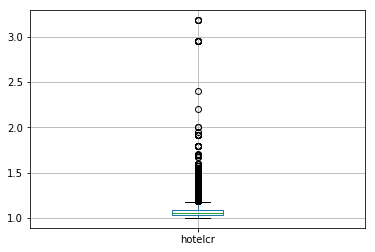

In [28]:
df.boxplot("hotelcr")

#df["hotelcr"].value_counts().sort_index()

#去除空值
notnull=df[pd.notnull(df["hotelcr"])]  
a=notnull["hotelcr"]
print(Counter(a))  #分组计数
print (Counter(a).most_common(1)) #查看出现最多次数的数据

#分箱
c=pd.Series(a)  
s=pd.cut(c,[0,1,1.02,1.16,1.21,1.28,3.18])
#s.head()
print (Counter(s))  #查看分箱结果

In [29]:
df["hotelcr"] =  df["hotelcr"].fillna(df["hotelcr"].mean())

## 3.2.5查看缺失值填充效果

In [30]:
df.isnull().sum()

label                               0
sampleid                            0
d                                   0
arrival                             0
iforderpv_24h                       0
decisionhabit_user                  0
historyvisit_7ordernum              0
historyvisit_totalordernum          0
hotelcr                             0
ordercanceledprecent                0
landhalfhours                       0
ordercanncelednum                   0
commentnums                         0
starprefer                          0
novoters                            0
consuming_capacity                  0
historyvisit_avghotelnum            0
cancelrate                          0
historyvisit_visit_detailpagenum    0
delta_price1                        0
price_sensitive                     0
hoteluv                             0
businessrate_pre                    0
ordernum_oneyear                    0
cr_pre                              0
avgprice                            0
lowestprice 

## 3.3异常值检测与处理

### 异常值用99%分位数替换

In [31]:
df.describe()

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
count,689945.000000,6.899450e+05,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,...,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,6.899450e+05,689945.000000
mean,0.274452,6.285402e+05,0.193737,3.411795,1.102882,6.560517,1.060996,0.222063,5.833780,100.075080,...,314.911451,101830.919401,0.372241,10.529887,2.126921,12049.409382,1.091238,153.702414,1.612763e+04,14.462315
std,0.446238,4.146815e+05,0.395226,28.874433,0.780650,14.160372,0.045238,0.328781,12.213393,329.344617,...,344.796034,98921.924830,0.205883,15.649060,3.476689,23731.035005,0.179031,277.807697,2.122417e+05,6.301575
min,0.000000,2.463600e+04,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,0.000000,3.123200e+05,0.000000,1.000000,1.000000,0.000000,1.030000,0.000000,0.000000,0.000000,...,148.000000,29358.000000,0.210000,0.773000,0.087000,724.000000,1.000000,17.000000,5.800000e+02,11.000000
50%,0.000000,5.996370e+05,0.000000,1.000000,1.000000,1.000000,1.050000,0.000000,0.000000,0.000000,...,233.000000,101830.919400,0.400000,3.447000,0.520000,3998.000000,1.000000,62.000000,1.315000e+03,15.000000
75%,1.000000,8.874600e+05,0.000000,3.000000,1.000000,7.000000,1.090000,0.400000,3.000000,5.000000,...,378.000000,101830.919400,0.530000,12.880000,2.633000,12049.409382,1.130000,180.000000,2.690000e+03,20.000000
max,1.000000,2.238426e+06,1.000000,3167.000000,106.000000,711.000000,3.180000,1.000000,49.000000,13475.000000,...,43700.000000,527026.000000,0.990000,67.140000,14.507000,194386.000000,11.000000,9956.000000,9.651192e+06,23.000000


### decisionhabit_user

In [31]:
np.percentile(df["decisionhabit_user"],99)

22.0

In [32]:
df["decisionhabit_user"] = [((i>22)*22 or i )for i in df["decisionhabit_user"]]

In [33]:
df["decisionhabit_user"].describe()

count    689945.000000
mean          2.889743
std           3.614480
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          22.000000
Name: decisionhabit_user, dtype: float64

### historyvisit_7ordernum

In [34]:
df["historyvisit_7ordernum"].describe()

count    689945.000000
mean          1.102882
std           0.780650
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         106.000000
Name: historyvisit_7ordernum, dtype: float64

In [35]:
np.percentile(df["historyvisit_7ordernum"],99)

4.0

In [36]:
df["historyvisit_7ordernum"] = [((i>4)*4 or i )for i in df["historyvisit_7ordernum"]]

In [37]:
df["historyvisit_7ordernum"].describe()

count    689945.000000
mean          1.086040
std           0.415115
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: historyvisit_7ordernum, dtype: float64

### historyvisit_totalordernum

In [38]:
df["historyvisit_totalordernum"].describe()

count    689945.000000
mean          6.560517
std          14.160372
min           0.000000
25%           0.000000
50%           1.000000
75%           7.000000
max         711.000000
Name: historyvisit_totalordernum, dtype: float64

In [39]:
np.percentile(df["historyvisit_totalordernum"],99)

67.0

In [40]:
df["historyvisit_totalordernum"] = [((i>67)*67 or i )for i in df["historyvisit_totalordernum"]]

In [41]:
df["historyvisit_totalordernum"].describe()

count    689945.000000
mean          6.253781
std          11.828355
min           0.000000
25%           0.000000
50%           1.000000
75%           7.000000
max          67.000000
Name: historyvisit_totalordernum, dtype: float64

### ordercanncelednum

In [42]:
df["ordercanncelednum"].describe()

count    689945.000000
mean        100.075080
std         329.344617
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max       13475.000000
Name: ordercanncelednum, dtype: float64

In [43]:
np.percentile(df["ordercanncelednum"],99)

1489.0

In [44]:
df["ordercanncelednum"] = [((i>1489)*1489 or i )for i in df["ordercanncelednum"]]

In [45]:
df["ordercanncelednum"].describe()

count    689945.000000
mean         91.685444
std         250.557821
min           0.000000
25%           0.000000
50%           0.000000
75%           5.000000
max        1489.000000
Name: ordercanncelednum, dtype: float64

### commentnums

In [46]:
df["commentnums"].describe()

count    689945.000000
mean       1146.870291
std        2031.402233
min           0.000000
25%          50.000000
50%         396.000000
75%        1466.000000
max       34189.000000
Name: commentnums, dtype: float64

In [47]:
np.percentile(df["commentnums"],99)

8323.0

In [48]:
df["commentnums"] = [((i>8323)*8323 or i )for i in df["commentnums"]]

In [49]:
df["commentnums"].describe()

count    689945.000000
mean       1092.295157
std        1617.064068
min           0.000000
25%          50.000000
50%         396.000000
75%        1466.000000
max        8323.000000
Name: commentnums, dtype: float64

### historyvisit_avghotelnum

In [50]:
df["historyvisit_avghotelnum"].describe()

count    689945.000000
mean          3.659918
std          30.944297
min           0.000000
25%           0.000000
50%           1.000000
75%           4.300000
max        3167.000000
Name: historyvisit_avghotelnum, dtype: float64

In [51]:
np.percentile(df["historyvisit_avghotelnum"],99)

24.0

In [52]:
df["historyvisit_avghotelnum"] = [((i>24)*24 or i )for i in df["historyvisit_avghotelnum"]]

In [53]:
df["historyvisit_avghotelnum"].describe()

count    689945.000000
mean          3.020588
std           4.478137
min           0.000000
25%           0.000000
50%           1.000000
75%           4.300000
max          24.000000
Name: historyvisit_avghotelnum, dtype: float64

### cancelrate

In [54]:
df["cancelrate"].describe()

count    689945.000000
mean       1033.743738
std        1502.353621
min           0.000000
25%         124.000000
50%         485.000000
75%        1351.000000
max       18930.000000
Name: cancelrate, dtype: float64

In [55]:
np.percentile(df["cancelrate"],99)

6362.0

In [56]:
df["cancelrate"] = [((i>6362)*6362 or i )for i in df["cancelrate"]]

In [57]:
df["cancelrate"].describe()

count    689945.000000
mean       1002.450629
std        1305.655922
min           0.000000
25%         124.000000
50%         485.000000
75%        1351.000000
max        6362.000000
Name: cancelrate, dtype: float64

### historyvisit_visit_detailpagenum

In [58]:
df["historyvisit_visit_detailpagenum"].describe()

count    689945.000000
mean         16.544580
std          52.347349
min           0.000000
25%           0.000000
50%           0.000000
75%          15.000000
max        6199.000000
Name: historyvisit_visit_detailpagenum, dtype: float64

In [59]:
np.percentile(df["historyvisit_visit_detailpagenum"],99)

187.0

In [60]:
df["historyvisit_visit_detailpagenum"] = [((i>187)*187 or i )for i in df["historyvisit_visit_detailpagenum"]]

In [61]:
df["historyvisit_visit_detailpagenum"].describe()

count    689945.000000
mean         15.221605
std          32.438210
min           0.000000
25%           0.000000
50%           0.000000
75%          15.000000
max         187.000000
Name: historyvisit_visit_detailpagenum, dtype: float64

### hoteluv

In [62]:
df["hoteluv"].describe()

count    689945.000000
mean         95.024655
std         169.895107
min           0.007000
25%          10.453000
50%          36.180000
75%         107.600000
max        1722.613000
Name: hoteluv, dtype: float64

In [63]:
np.percentile(df["hoteluv"],99)

964.11300000000006

In [64]:
df["hoteluv"] = [((i>965)*965 or i )for i in df["hoteluv"]]

In [65]:
df["hoteluv"].describe()

count    689945.000000
mean         92.266936
std         150.603751
min           0.007000
25%          10.453000
50%          36.180000
75%         107.600000
max         965.000000
Name: hoteluv, dtype: float64

### ordernum_oneyear

In [66]:
df["ordernum_oneyear"].describe()

count    689945.000000
mean          7.556655
std          14.882772
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max         711.000000
Name: ordernum_oneyear, dtype: float64

In [67]:
np.percentile(df["ordernum_oneyear"],99)

70.0

In [68]:
df["ordernum_oneyear"] = [((i>70)*70 or i )for i in df["ordernum_oneyear"]]

In [69]:
df["ordernum_oneyear"].describe()

count    689945.000000
mean          7.240450
std          12.545981
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          70.000000
Name: ordernum_oneyear, dtype: float64

### lowestprice

In [70]:
df["lowestprice"].describe()

count    689945.000000
mean        318.459438
std         574.977150
min          -3.000000
25%         117.000000
50%         200.000000
75%         379.000000
max      100000.000000
Name: lowestprice, dtype: float64

In [71]:
np.percentile(df["lowestprice"],99)

1822.0

In [72]:
df["lowestprice"] = [((i>1822)*1822 or i )for i in df["lowestprice"]]

In [73]:
df["lowestprice"].describe()

count    689945.000000
mean        304.594002
std         297.058982
min          -3.000000
25%         117.000000
50%         200.000000
75%         379.000000
max        1822.000000
Name: lowestprice, dtype: float64

### customer_value_profit

In [74]:
df["customer_value_profit"].describe()

count    689945.000000
mean          1.933828
std           5.483893
min         -24.075000
25%           0.000000
50%           0.210000
75%           1.610000
max         598.064000
Name: customer_value_profit, dtype: float64

In [75]:
np.percentile(df["customer_value_profit"],99)

23.239999999999998

In [76]:
df["customer_value_profit"] = [((i>24)*24 or i )for i in df["customer_value_profit"]]

In [77]:
df["customer_value_profit"].describe()

count    689945.000000
mean          1.784586
std           3.901688
min         -24.075000
25%           0.000000
50%           0.210000
75%           1.610000
max          24.000000
Name: customer_value_profit, dtype: float64

### commentnums_pre2

In [78]:
df["commentnums_pre2"].describe()

count    689945.000000
mean       1313.388737
std        1667.012623
min           0.000000
25%         294.000000
50%         858.000000
75%        1688.000000
max       34189.000000
Name: commentnums_pre2, dtype: float64

In [79]:
np.percentile(df["commentnums_pre2"],99)

7239.1199999998789

In [80]:
df["commentnums_pre2"] = [((i>7239)*7239 or i )for i in df["commentnums_pre2"]]

In [81]:
df["commentnums_pre2"].describe()

count    689945.000000
mean       1272.441984
std        1372.492495
min           0.000000
25%         294.000000
50%         858.000000
75%        1688.000000
max        7239.000000
Name: commentnums_pre2, dtype: float64

### ctrip_profits

In [82]:
df["ctrip_profits"].describe()

count    689945.000000
mean          2.715531
std           7.748241
min         -44.313000
25%           0.000000
50%           0.287000
75%           2.267000
max         600.820000
Name: ctrip_profits, dtype: float64

In [83]:
np.percentile(df["ctrip_profits"],99)

32.876919999999579

In [84]:
df["ctrip_profits"] = [((i>32)*32 or i )for i in df["ctrip_profits"]]

In [85]:
df["ctrip_profits"].describe()

count    689945.000000
mean          2.474032
std           5.369065
min         -44.313000
25%           0.000000
50%           0.287000
75%           2.267000
max          32.000000
Name: ctrip_profits, dtype: float64

### deltaprice_pre2_t1

In [86]:
df["deltaprice_pre2_t1"].describe()

count    689945.000000
mean          3.010663
std          43.308054
min       -2296.000000
25%           0.000000
50%           2.000000
75%           7.000000
max        3324.000000
Name: deltaprice_pre2_t1, dtype: float64

In [87]:
np.percentile(df["deltaprice_pre2_t1"],99)

96.0

In [88]:
df["deltaprice_pre2_t1"] = [((i>96)*96 or i )for i in df["deltaprice_pre2_t1"]]

In [89]:
df["deltaprice_pre2_t1"].describe()

count    689945.000000
mean          1.835151
std          33.000171
min       -2296.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          96.000000
Name: deltaprice_pre2_t1, dtype: float64

### lowestprice_pre

In [90]:
df["lowestprice_pre"].describe()

count    689945.000000
mean        311.220476
std         453.980372
min           1.000000
25%         120.000000
50%         208.000000
75%         375.000000
max      100000.000000
Name: lowestprice_pre, dtype: float64

In [91]:
np.percentile(df["lowestprice_pre"],99)

1688.0

In [92]:
df["lowestprice_pre"] = [((i>1688)*1688 or i )for i in df["lowestprice_pre"]]

In [93]:
df["lowestprice_pre"].describe()

count    689945.000000
mean        299.485168
std         278.544966
min           1.000000
25%         120.000000
50%         208.000000
75%         375.000000
max        1688.000000
Name: lowestprice_pre, dtype: float64

### lowestprice_pre2

In [94]:
df["lowestprice_pre2"].describe()

count    689945.000000
mean        314.911451
std         344.796034
min           1.000000
25%         148.000000
50%         233.000000
75%         378.000000
max       43700.000000
Name: lowestprice_pre2, dtype: float64

In [95]:
np.percentile(df["lowestprice_pre2"],99)

1444.0

In [96]:
df["lowestprice_pre2"] = [((i>1444)*1444 or i )for i in df["lowestprice_pre2"]]

In [97]:
df["lowestprice_pre2"].describe()

count    689945.000000
mean        306.255242
std         243.101527
min           1.000000
25%         148.000000
50%         233.000000
75%         378.000000
max        1444.000000
Name: lowestprice_pre2, dtype: float64

### visitnum_oneyear

In [98]:
df["visitnum_oneyear"].describe()

count    6.899450e+05
mean     1.612763e+04
std      2.122417e+05
min      1.000000e+00
25%      5.800000e+02
50%      1.315000e+03
75%      2.690000e+03
max      9.651192e+06
Name: visitnum_oneyear, dtype: float64

In [99]:
np.percentile(df["visitnum_oneyear"],99)

185946.0

In [100]:
df["visitnum_oneyear"] = [((i>185946)*185946 or i )for i in df["visitnum_oneyear"]]

In [101]:
df["visitnum_oneyear"].describe()

count    689945.000000
mean       4744.271010
std       20344.464093
min           1.000000
25%         580.000000
50%        1315.000000
75%        2690.000000
max      185946.000000
Name: visitnum_oneyear, dtype: float64

# 4.特征工程

## 客户流失率统计

In [102]:
df["label"].value_counts().sort_index()

0    500588
1    189357
Name: label, dtype: int64

In [103]:
churn_percent = 189357 / 689945 * 100
print('客户流失率为：', churn_percent, '%')

客户流失率为： 27.445231141612737 %


## 特征探索

In [104]:
df.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,1.0,1.0,0.0,1.04,0.0,...,615.0,101830.9194,0.29,12.880,3.147,12049.409382,1.0,7,1315.0,12
1,1,24637,2016-05-18,2016-05-18,0,1.0,1.0,0.0,1.06,0.0,...,513.0,101830.9194,0.53,17.933,4.913,12049.409382,1.0,33,1315.0,14
2,0,24641,2016-05-18,2016-05-19,0,1.0,1.0,0.0,1.05,0.0,...,382.0,101830.9194,0.60,3.993,0.760,12049.409382,1.0,10,1315.0,19
3,0,24642,2016-05-18,2016-05-18,0,1.0,1.0,0.0,1.01,0.0,...,203.0,101830.9194,0.18,3.220,0.660,12049.409382,1.0,8,1315.0,16
4,1,24644,2016-05-18,2016-05-19,0,1.0,1.0,0.0,1.00,0.0,...,84.0,101830.9194,0.40,0.013,0.000,12049.409382,1.0,1,1315.0,21


## 相关系数矩阵图

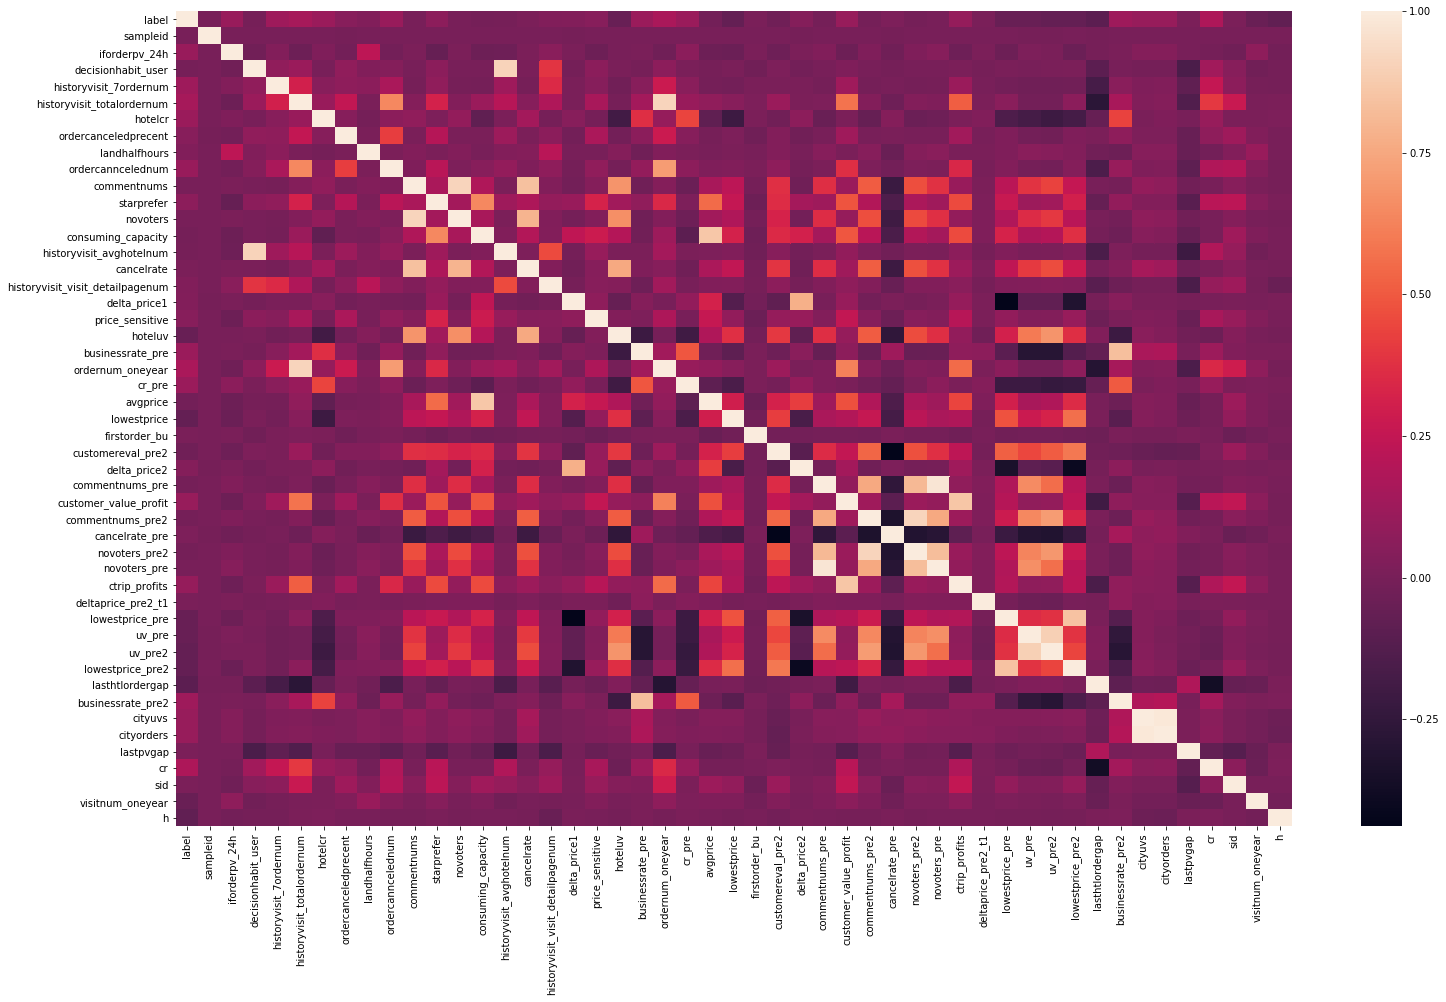

In [105]:
corr = df.corr()
plt.figure(figsize=(25,15))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns.heatmap(corr)

## 相关系数矩阵

In [106]:
corr_matrix=df.corr()
corr_matrix

,label,sampleid,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
label,1.000000,-0.000488,0.110308,-0.006281,0.123224,0.156307,0.115490,0.054683,0.030794,0.110960,...,-0.067192,-0.092069,0.127125,0.101612,0.104055,0.010513,0.175626,0.011458,-0.049723,-0.077728
sampleid,-0.000488,1.000000,-0.000424,0.002288,-0.000159,0.001548,0.000960,-0.001458,0.001004,-0.000499,...,0.001376,-0.002480,0.001692,0.000813,0.000717,0.000996,0.000528,0.002344,0.000748,0.001813
iforderpv_24h,0.110308,-0.000424,1.000000,-0.017972,0.035144,-0.034957,0.024412,-0.017410,0.233316,-0.015405,...,-0.044341,-0.002790,0.005363,0.039791,0.038644,0.002726,-0.009877,-0.023918,0.073917,-0.012849
decisionhabit_user,-0.006281,0.002288,-0.017972,1.000000,0.083232,0.112525,0.003385,0.079889,0.030101,0.040559,...,0.012517,-0.091820,0.000347,-0.008066,-0.007477,-0.154416,0.136155,0.054192,-0.022088,-0.006435
historyvisit_7ordernum,0.123224,-0.000159,0.035144,0.083232,1.000000,0.306663,0.051603,0.073868,0.062787,0.164854,...,-0.018438,-0.171811,0.056891,0.025876,0.031271,-0.079790,0.252951,0.067081,-0.002585,-0.010661
historyvisit_totalordernum,0.156307,0.001548,-0.034957,0.112525,0.306663,1.000000,0.107259,0.250993,0.008633,0.643149,...,0.062697,-0.273452,0.161093,0.032833,0.038694,-0.132500,0.401043,0.271528,0.005545,0.012624
hotelcr,0.115490,0.000960,0.024412,0.003385,0.051603,0.107259,1.000000,0.046119,-0.008972,0.066021,...,-0.178787,-0.057268,0.432285,0.004895,0.023301,0.003915,0.104828,0.015121,0.012950,0.018819
ordercanceledprecent,0.054683,-0.001458,-0.017410,0.079889,0.073868,0.250993,0.046119,1.000000,0.006852,0.416004,...,0.025668,0.013970,0.075949,0.018590,0.020465,-0.054504,0.077637,0.125933,0.028979,0.002492
landhalfhours,0.030794,0.001004,0.233316,0.030101,0.062787,0.008633,-0.008972,0.006852,1.000000,0.011920,...,0.030547,-0.021356,-0.035400,0.046140,0.045171,-0.056650,-0.012352,0.033146,0.108245,0.002011
ordercanncelednum,0.110960,-0.000499,-0.015405,0.040559,0.164854,0.643149,0.066021,0.416004,0.011920,1.000000,...,0.039312,-0.150695,0.103317,0.023559,0.027644,-0.087250,0.185397,0.198350,0.043899,-0.003646


## 自变量与因变量之间的相关性

In [107]:
corr_matrix["label"]

label                               1.000000
sampleid                           -0.000488
iforderpv_24h                       0.110308
decisionhabit_user                 -0.006281
historyvisit_7ordernum              0.123224
historyvisit_totalordernum          0.156307
hotelcr                             0.115490
ordercanceledprecent                0.054683
landhalfhours                       0.030794
ordercanncelednum                   0.110960
commentnums                         0.004604
starprefer                          0.066936
novoters                            0.003458
consuming_capacity                 -0.006705
historyvisit_avghotelnum           -0.003026
cancelrate                          0.014955
historyvisit_visit_detailpagenum    0.028085
delta_price1                        0.033671
price_sensitive                     0.050961
hoteluv                            -0.052476
businessrate_pre                    0.112417
ordernum_oneyear                    0.166488
cr_pre    

In [ ]:
#可以看出变量"decisionhabit_user","deltaprice_pre2_t1","novoters_pre"与目标变量的相关性非常低

## 衍生变量

In [108]:
#生成入住日期与访问日期差值的新变量interval
df[['arrival','d']] = df[['arrival','d']].apply(pd.to_datetime)
df["interval"] = df['arrival']-df['d']
df["interval"].head()

0   0 days
1   0 days
2   1 days
3   0 days
4   1 days
Name: interval, dtype: timedelta64[ns]

In [109]:
#生成arr_weekday新变量
arr = []
for i in df["arrival"]:
    i = i.weekday()
    #print(i)
    arr.append(i)
arr = pd.Series(arr)
df["arr"] = arr.values
#df["arr"].head()
df["arr_weekday"] = df["arr"].map(lambda x: 1 if x == 0 or x == 6 else 0)
df["arr_weekday"].head()

0    0
1    0
2    0
3    0
4    0
Name: arr_weekday, dtype: int64

In [110]:
#生成d_weekday新变量
d_week = []
for j in df["d"]:
    j = j.weekday()
    #print(j)
    d_week.append(j)
d_week = pd.Series(d_week)
df["d_week"] = d_week.values
df["d_weekday"] = df["d_week"].map(lambda x: 1 if x == 0 or x == 6 else 0)
df["d_weekday"].head()

0    0
1    0
2    0
3    0
4    0
Name: d_weekday, dtype: int64

In [111]:
df.head(3)

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lastpvgap,cr,sid,visitnum_oneyear,h,interval,arr,arr_weekday,d_week,d_weekday
0,0,24636,2016-05-18,2016-05-18,0,1.0,1.0,0.0,1.04,0.0,...,12049.409382,1.0,7,1315.0,12,0 days,2,0,2,0
1,1,24637,2016-05-18,2016-05-18,0,1.0,1.0,0.0,1.06,0.0,...,12049.409382,1.0,33,1315.0,14,0 days,2,0,2,0
2,0,24641,2016-05-18,2016-05-19,0,1.0,1.0,0.0,1.05,0.0,...,12049.409382,1.0,10,1315.0,19,1 days,3,0,2,0


In [112]:
del df["arr"]

In [113]:
del df["d_week"]

In [114]:
df.to_csv("cleaned_data.csv",sep = ",")